# Definición del entorno de trabajo

## Conda
* Conda es un gestor de paquetes, dependencias y ambientes de trabajo para varios lenguajes: Python, R, Ruby, Lua, Scala, Java, Javascript, C/ C++, FORTRAN.
* Permite instalar y gestionar multiples versiones de paquetes de software y switchear fácilmente entre ellas.
* Disponible para Linux, OS X y Windows.
* Viene incluído en las plataformas Miniconda y Anaconda.
* Para la documentación completa sobre el proyecto Conda, visitar: https://conda.io/docs/index.html

### Miniconda

* Miniconda solo incluye Conda, Python y los paquetes de los que ellos dependen. 
* Mas de 720 paquetes para uso científico y sus dependencias pueden ser gestionados con esta plataforma en forma individual.


### Anaconda

* Anaconda además incluye 150 paquetes para uso científico pre-instalados (con sus dependencias). 
* Mas de 720 paquetes para uso científico y sus dependencias pueden ser gestionados con esta plataforma en forma individual.
* Los paquetes disponibles y preinstalados se pueden consultar en: https://docs.continuum.io/anaconda/packages/pkg-docs
* Dentro de los paquetes pre-instalados se encuentran **Jupyter**, **Scipy**, **Numpy**, **Pandas** y **Matplotlib**, los cuales serán muy utilizados durante el curso.

### Conda como gestor de paquetes

* La información completa sobre cómo utilizar Conda como gestor de paquetes se puede ver en: https://conda.io/docs/using/pkgs.html
* A continuación una lista de comandos útiles a modo de resumen:
    * conda list 
    * conda install
    * conda update
    * conda remove

### Conda como gestor de ambientes de trabajo (enviroments)

* Con conda se pueden crear, exportar, listar, borrar y actualizar enviroments que tienen distintas versiones de Python, y/o paquetes instalados.
* A cambiar de un enviroment a otro se lo denomina *activar* en enviroment.
* La información completa sobre cómo utilizar Conda como gestor de enviroments se puede ver en: https://conda.io/docs/using/envs.html
* A continuación una lista de comandos útiles a modo de resumen:
    * conda create --name lab-ml-prueba biopython
    * source activate lab-ml-prueba (Linux / OS X)/ activate lab-ml-prueba (Windows)
    * source deactivate (Linux / OS X) / deactivate
    * conda info --envs
    * conda create --name flowers --clone snowflakes
    * conda remove --name flowers --all

### Gestionando Python con conda
* conda trata a Python como cualquier otro paquete, por lo que es muy sencillo trabajar con diferentes versiones de Python.
* La información completa sobre cómo gestionar las distintas versiones de Python utilizando conda se puede ver en: https://conda.io/docs/py2or3.html

## Jupyter

* Es una aplicación web de código abierto que permite crear y compartir documentos que contienen:
    * Código vivo
    * Ecuaciones
    * Gráficos
    * Documentación
* Viene incluído como paquete preinstalado de Anaconda

### Código vivo

In [3]:
a = "Hola Munda"
print(a)

Hola Munda


### Markdown
* Es un lenguaje de marcado ligero que trata de conseguir la máxima legibilidad y facilidad de publicación tanto en su forma de entrada como de salida.
* Integra formatos estandars como latex, html y svg entre otros.
* Más información sobre [Markdown](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html)
* Ejemplo: Ecuaciones en formato latex

Vectores:

$$
{n+1\choose k} = {n\choose k} + {n \choose k-1}
$$

Definiciones:
$$
|x| = \left\{ \begin{array}{rl}
 -x &\mbox{ if $x<0$} \\
  x &\mbox{ otherwise}
       \end{array} \right.
$$

Matrices

$$
F(x,y)=0 ~~\mbox{and}~~
\left| \begin{array}{ccc}
  F''_{xx} & F''_{xy} &  F'_x \\
  F''_{yx} & F''_{yy} &  F'_y \\
  F'_x     & F'_y     & 0 
  \end{array}\right| = 0
$$

y mucho mas!

### Gráficos

* Para mas información ver la documentación de [matplotlib](https://matplotlib.org/index.html)


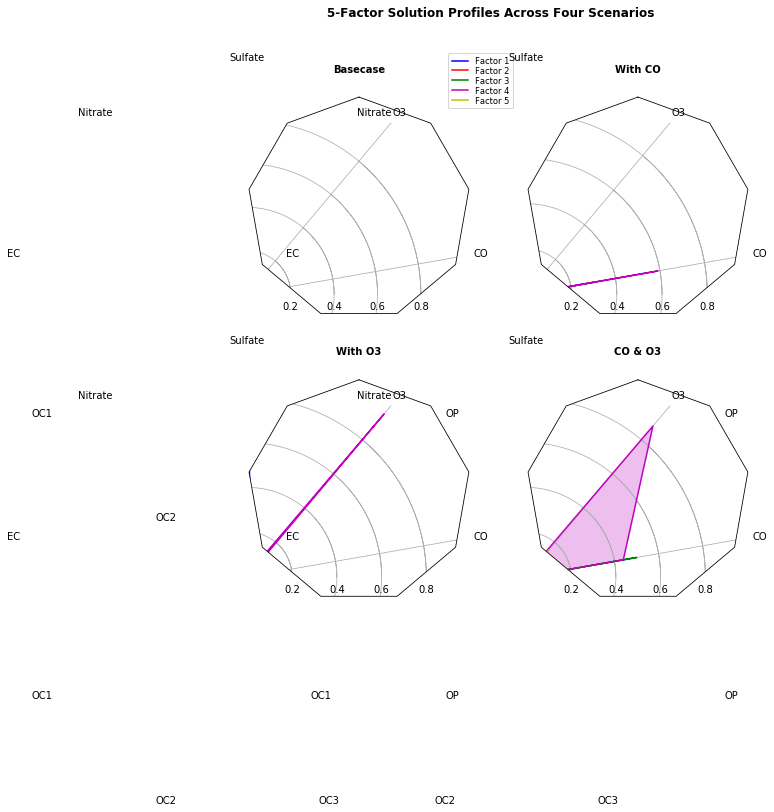

In [3]:
"""
======================================
Radar chart (aka spider or star chart)
======================================

This example creates a radar chart, also known as a spider or star chart [1]_.

Although this example allows a frame of either 'circle' or 'polygon', polygon
frames don't have proper gridlines (the lines are circles instead of polygons).
It's possible to get a polygon grid by setting GRIDLINE_INTERPOLATION_STEPS in
matplotlib.axis to the desired number of vertices, but the orientation of the
polygon is not aligned with the radial axes.

.. [1] http://en.wikipedia.org/wiki/Radar_chart
"""
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See  doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    data = [
        ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3'],
        ('Basecase', [
            [0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
            [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
            [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
            [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
            [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]]),
        ('With CO', [
            [0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
            [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
            [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
            [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
            [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]]),
        ('With O3', [
            [0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
            [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
            [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
            [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
            [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]]),
        ('CO & O3', [
            [0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
            [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
            [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
            [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
            [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]])
    ]
    return data


if __name__ == '__main__':
    N = 9
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                             subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for ax, (title, case_data) in zip(axes.flatten(), data):
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    ax = axes[0, 0]
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = ax.legend(labels, loc=(0.9, .95),
                       labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()

### Documentación

* Como la presente! 
* Además de una gran variedad de extensiones que permiten mejorar y potenciar los notebooks de Jupyter:
    * https://github.com/ipython-contrib/jupyter_contrib_nbextensions
    * https://anaconda.org/damianavila82/rise $\rightarrow$ Presentaciones

## Python
* Python es un lenguaje de programación interpretado cuya filosofía hace hincapié en una sintaxis que favorezca un código legible.
* Se trata de un lenguaje de programación multiparadigma, ya que soporta orientación a objetos, programación imperativa y, en menor medida, programación funcional. 
* Es un lenguaje interpretado, usa tipado dinámico y es multiplataforma.
* Utilizaremos la versión 3.6
* Muchísima información en: https://www.python.org/doc/  